# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Fecha de reporte web', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Tipo', 'País de procedencia', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/20),height+3, int(height), fontsize=11, color='dimgrey', rotation=75)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+3,ax.patches[i].get_y()+(ax.patches[i].get_height()/20), int(width), fontsize=11, color='dimgrey', rotation=-15)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line graphics libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos COVID-19 (Colombia)

In [6]:
data

,Fecha de diagnóstico,Fecha de notificación,Fecha de inicio de síntomas,Fecha de recuperación,Fecha de defunción,Fecha de reporte web,Ciudad de ubicación,Departamento,Severidad,Estado,Edad,Clasificación de edad,Sexo,Tipo,País de procedencia,Código DIVIPOLA
Id de caso,,,,,,,,,,,,,,,,
1,2020-03-06,2020-03-02,2020-02-27 00:00:00,2020-03-13 00:00:00,- -,2020-03-06,Bogotá d.c.,Bogotá D.C.,Leve,Recuperado,19,10 - 20,F,Importado,Italia,11001
2,2020-03-09,2020-03-06,2020-03-04 00:00:00,2020-03-19 00:00:00,- -,2020-03-09,Guadalajara de buga,Valle del Cauca,Leve,Recuperado,34,30 - 40,M,Importado,España,76111
3,2020-03-09,2020-03-07,2020-02-29 00:00:00,2020-03-15 00:00:00,- -,2020-03-09,Medellín,Antioquia,Leve,Recuperado,50,40 - 50,F,Importado,España,5001
4,2020-03-11,2020-03-09,2020-03-06 00:00:00,2020-03-26 00:00:00,- -,2020-03-11,Medellín,Antioquia,Leve,Recuperado,55,50 - 60,M,Relacionado,Colombia,5001
5,2020-03-11,2020-03-09,2020-03-08 00:00:00,2020-03-23 00:00:00,- -,2020-03-11,Medellín,Antioquia,Leve,Recuperado,25,20 - 30,M,Relacionado,Colombia,5001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2020-05-06,2020-04-20,2020-04-20 00:00:00,- -,- -,2020-05-06,San andrés de tumaco,Nariño,Leve,Casa,46,40 - 50,M,Relacionado,Colombia,52835
8996,2020-05-06,2020-04-28,Asintomáti,- -,- -,2020-05-06,Ipiales,Nariño,Leve,Casa,31,30 - 40,M,Relacionado,Colombia,52356
8997,2020-05-06,2020-04-28,Asintomáti,- -,- -,2020-05-06,Ipiales,Nariño,Leve,Casa,32,30 - 40,M,Relacionado,Colombia,52356


### - Mapa de influencia - COVID-19 (Colombia) [*Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
Amazonas,103.0,127.0
Antioquia,232.0,224.0
Archipiélago de San Andrés Providencia y Santa Catalina,0.0,6.0
Atlántico,132.0,228.0
Barranquilla D.E.,130.0,189.0
Bogotá D.C.,1729.0,1740.0
Bolívar,13.0,18.0
Boyacá,31.0,29.0
Buenaventura D.E.,22.0,26.0


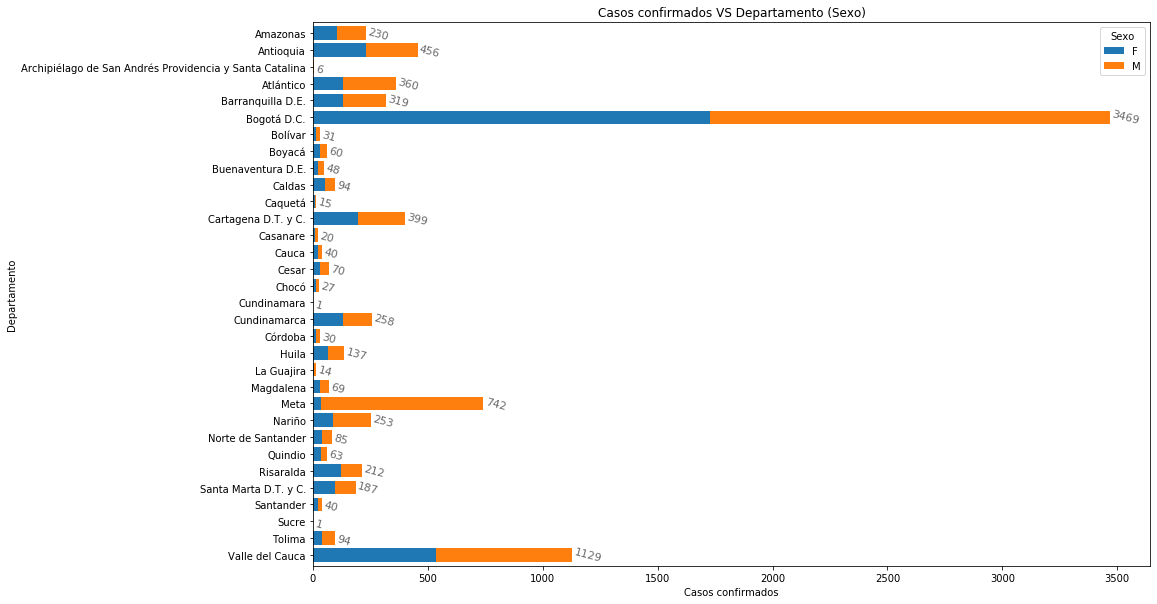

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
Amazonas,12,29,47,42,33,30,19,15,2,1
Antioquia,15,24,118,96,59,87,32,12,12,1
Archipiélago de San Andrés Providencia y Santa Catalina,0,0,0,2,3,0,1,0,0,0
Atlántico,29,40,70,74,70,35,24,12,5,1
Barranquilla D.E.,24,51,62,48,49,33,23,15,13,1
Bogotá D.C.,156,252,730,715,542,501,314,183,56,20
Bolívar,1,0,7,8,4,5,3,3,0,0
Boyacá,2,8,10,8,11,7,6,5,2,1
Buenaventura D.E.,2,6,13,9,5,5,4,3,1,0


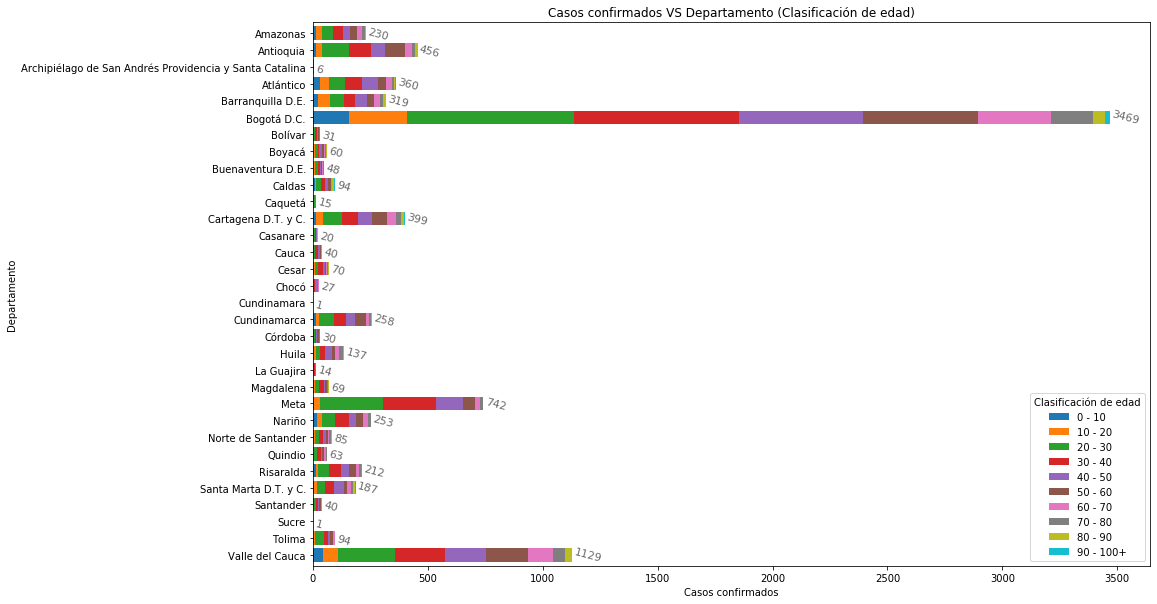

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Departamento,,,,,,
Amazonas,202.0,14.0,14.0,0.0,0.0,0.0
Antioquia,213.0,6.0,11.0,10.0,0.0,216.0
Archipiélago de San Andrés Providencia y Santa Catalina,2.0,0.0,0.0,0.0,0.0,4.0
Atlántico,308.0,12.0,12.0,5.0,0.0,23.0
Barranquilla D.E.,223.0,19.0,25.0,5.0,0.0,47.0
Bogotá D.C.,2251.0,128.0,214.0,39.0,1.0,836.0
Bolívar,16.0,3.0,0.0,1.0,0.0,11.0
Boyacá,33.0,3.0,5.0,0.0,1.0,18.0
Buenaventura D.E.,40.0,3.0,3.0,0.0,0.0,2.0


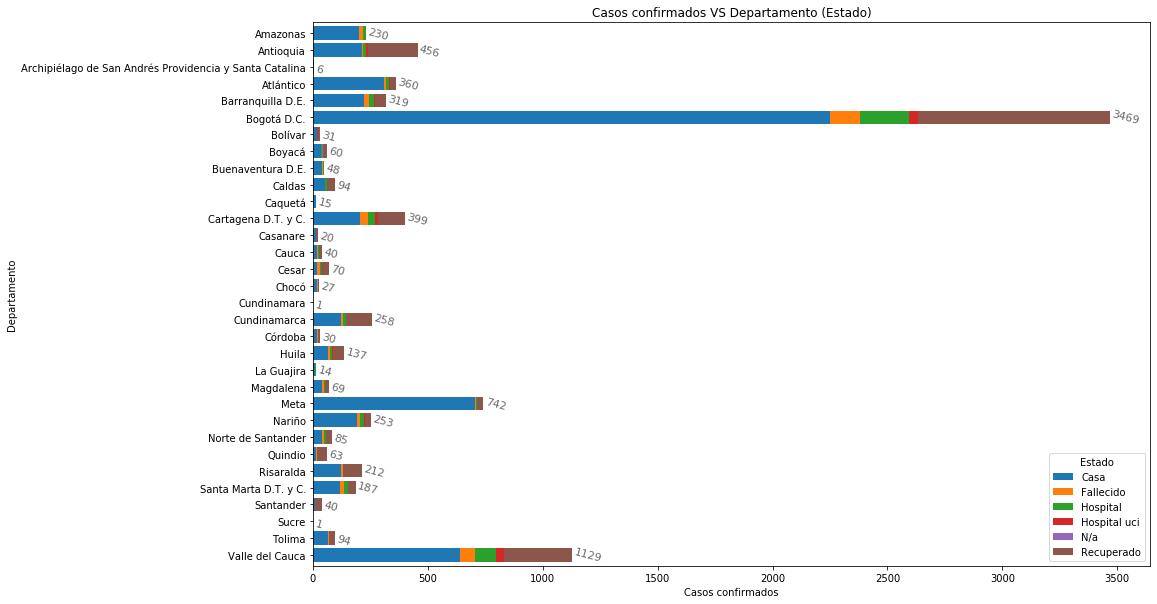

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,2512,3276
Fallecido,154,243
Hospital,170,328
Hospital uci,47,76
N/a,2,3
Recuperado,1089,1059


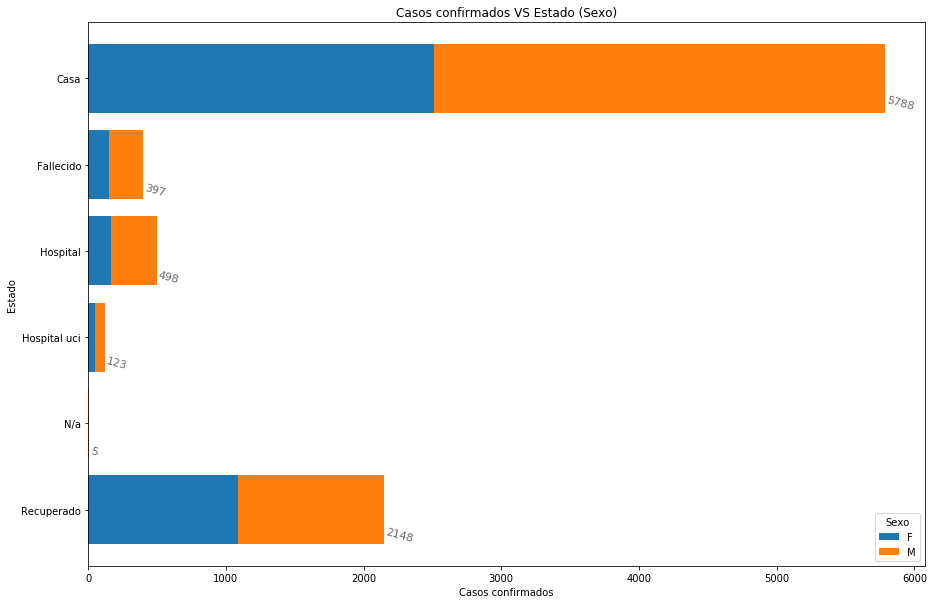

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,289,494,1481,1292,926,722,342,178,53,11
Fallecido,3,2,8,15,37,53,100,107,56,16
Hospital,26,11,40,71,78,101,76,62,26,7
Hospital uci,2,3,10,7,17,25,28,19,10,2
N/a,0,2,1,1,0,0,0,0,0,1
Recuperado,76,126,496,502,365,319,163,72,26,3


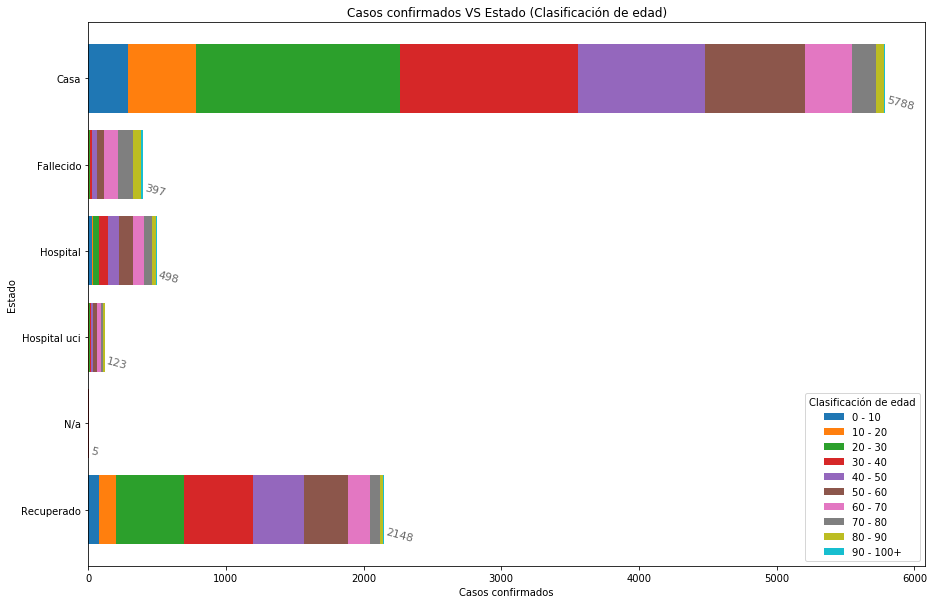

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,2503,2668
Importado,386,436
Relacionado,1085,1881


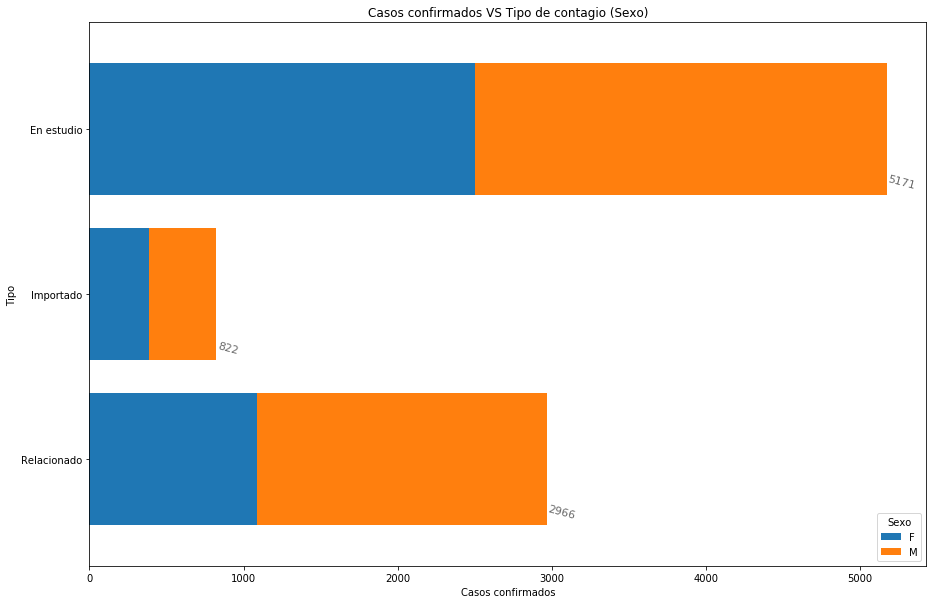

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,260,396,1049,988,824,738,443,313,128,32
Importado,4,27,196,188,141,135,90,32,9,0
Relacionado,132,215,791,712,458,347,176,93,34,8


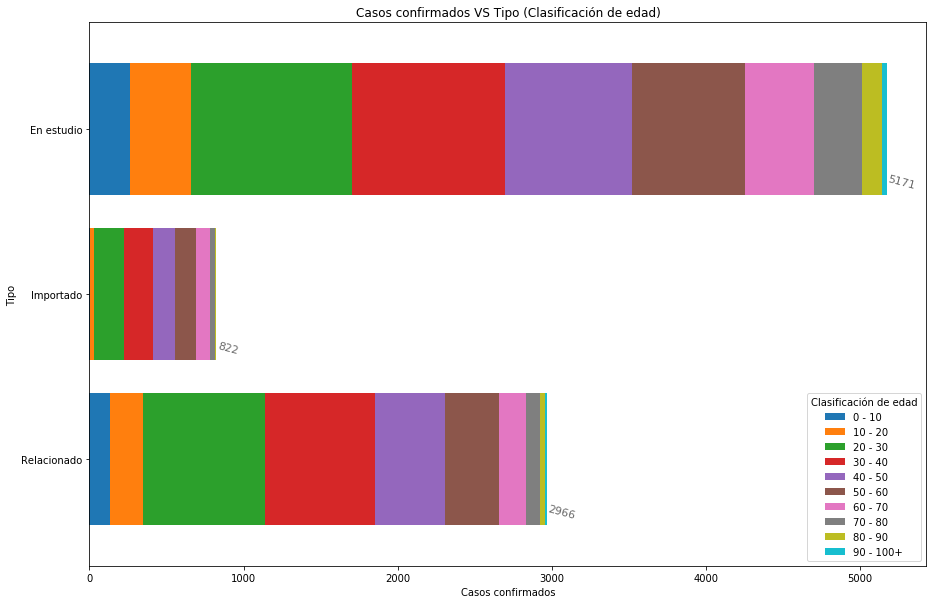

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,171,225
10 - 20,288,350
20 - 30,875,1161
30 - 40,836,1052
40 - 50,648,775
50 - 60,540,680
60 - 70,309,400
70 - 80,188,250
80 - 90,87,84


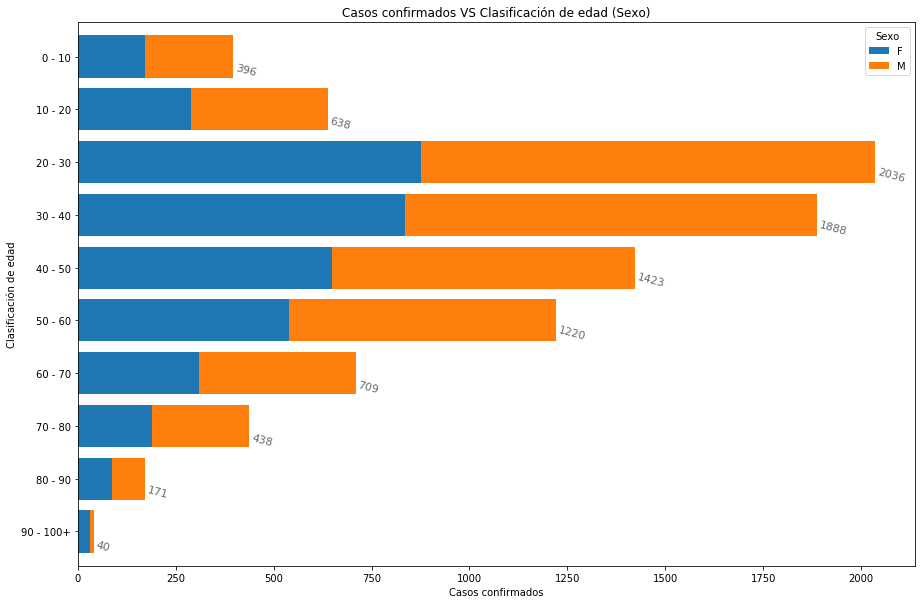

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Clasificación de edad,,,,,,
0 - 10,289,3,26,2,0,76
10 - 20,494,2,11,3,2,126
20 - 30,1481,8,40,10,1,496
30 - 40,1292,15,71,7,1,502
40 - 50,926,37,78,17,0,365
50 - 60,722,53,101,25,0,319
60 - 70,342,100,76,28,0,163
70 - 80,178,107,62,19,0,72
80 - 90,53,56,26,10,0,26


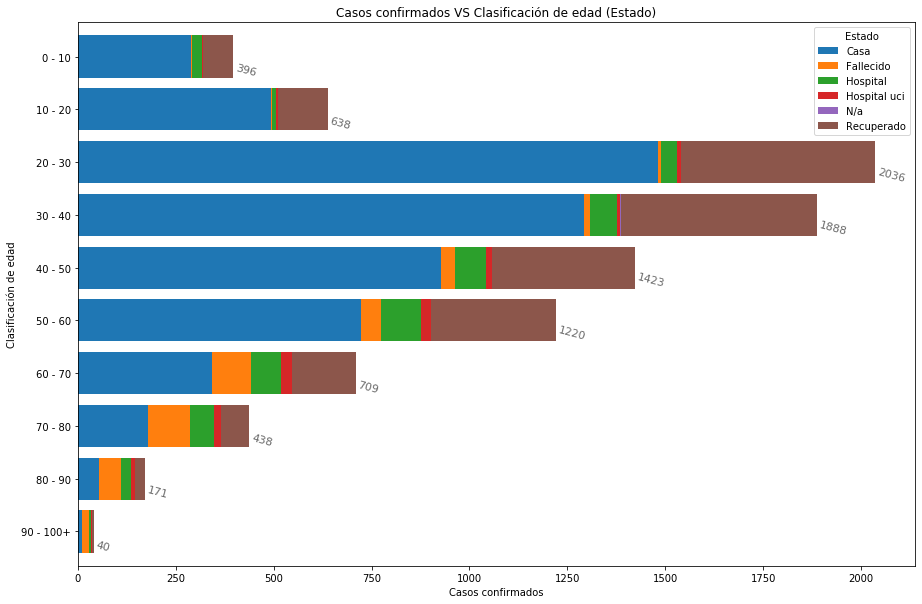

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,1.0,1.0
2020-03-11,4.0,2.0
2020-03-12,5.0,0.0
2020-03-13,2.0,3.0
2020-03-14,7.0,11.0
2020-03-15,10.0,6.0
2020-03-16,2.0,12.0
2020-03-17,12.0,13.0


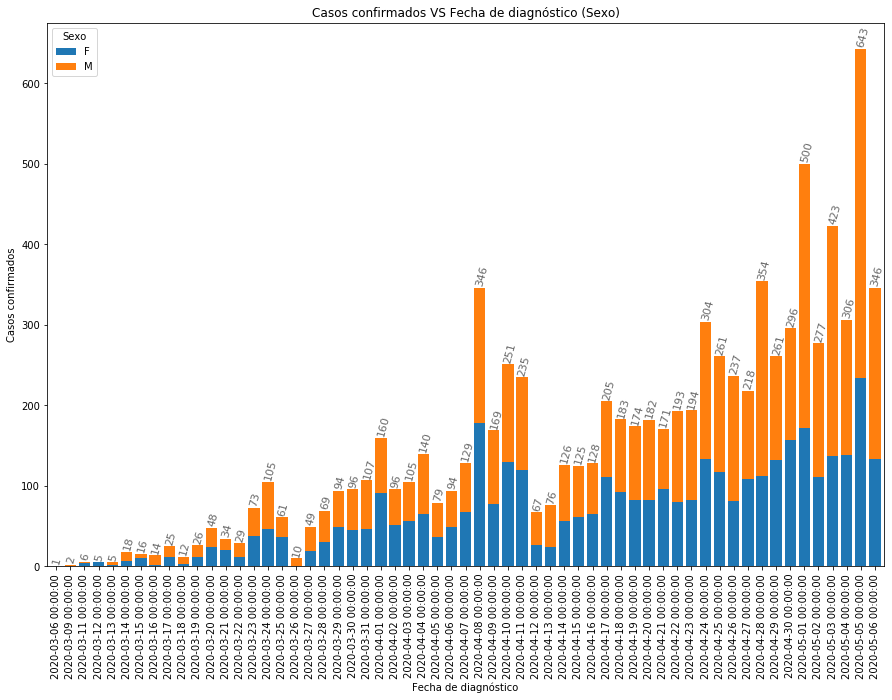

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,1,1,0,0,0,0,0
2020-03-11,0,0,4,0,0,1,0,0,1,0
2020-03-12,0,0,0,1,1,1,1,1,0,0
2020-03-13,0,0,1,0,2,0,2,0,0,0
2020-03-14,0,1,7,1,1,4,0,4,0,0
2020-03-15,0,0,6,2,4,2,2,0,0,0
2020-03-16,0,1,5,5,0,2,1,0,0,0
2020-03-17,1,2,4,5,5,7,0,1,0,0


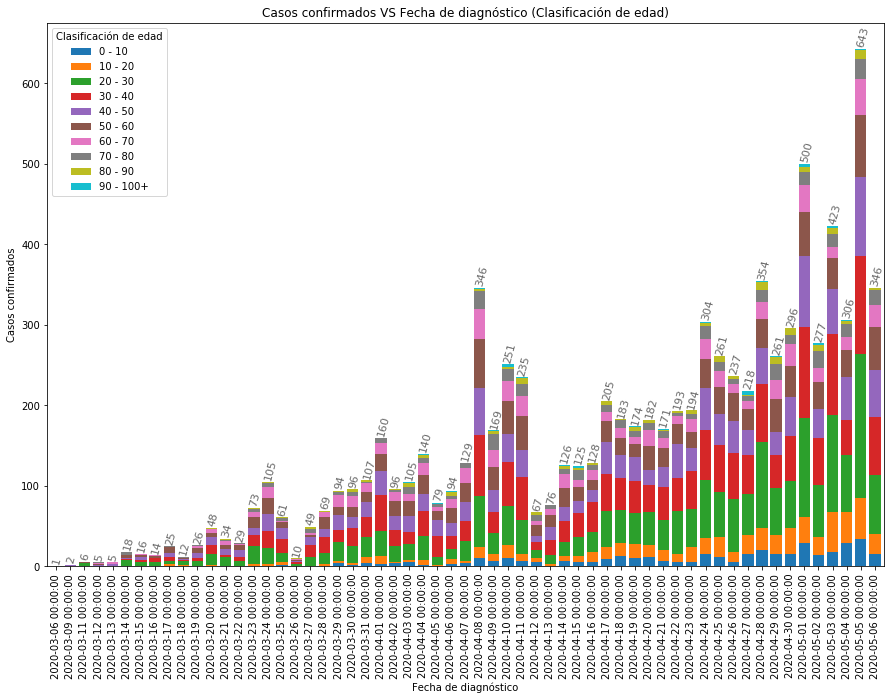

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,2.0
2020-03-11,0.0,0.0,0.0,0.0,0.0,6.0
2020-03-12,0.0,0.0,0.0,0.0,0.0,5.0
2020-03-13,1.0,0.0,0.0,0.0,0.0,4.0
2020-03-14,0.0,0.0,0.0,0.0,0.0,18.0
2020-03-15,1.0,0.0,0.0,0.0,0.0,15.0
2020-03-16,0.0,1.0,0.0,0.0,0.0,13.0
2020-03-17,1.0,0.0,0.0,0.0,0.0,24.0


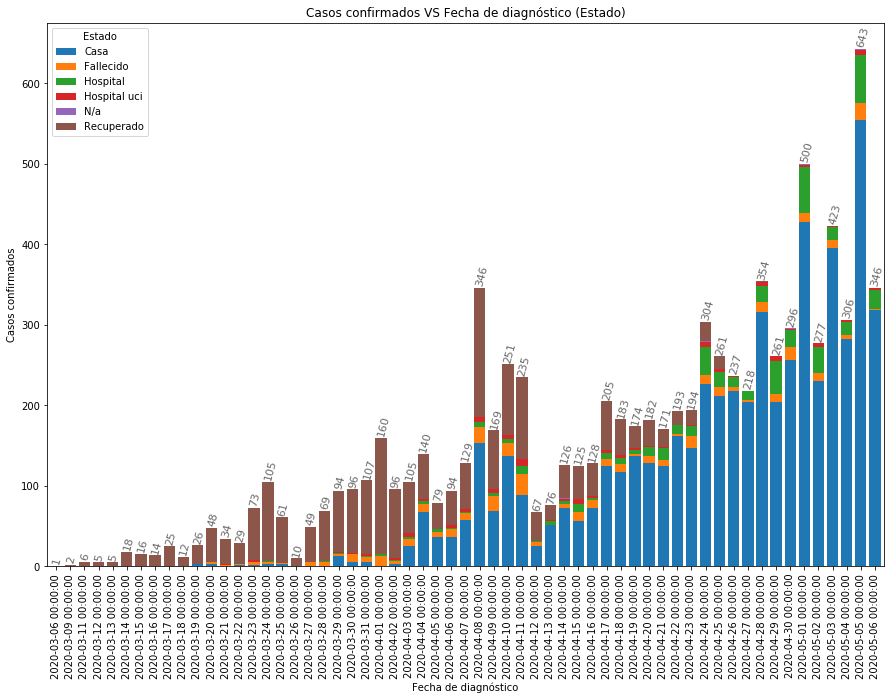

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,2.0,1.0
2020-03-11,6.0,3.0
2020-03-12,11.0,3.0
2020-03-13,13.0,6.0
2020-03-14,20.0,17.0
2020-03-15,30.0,23.0
2020-03-16,32.0,35.0
2020-03-17,44.0,48.0


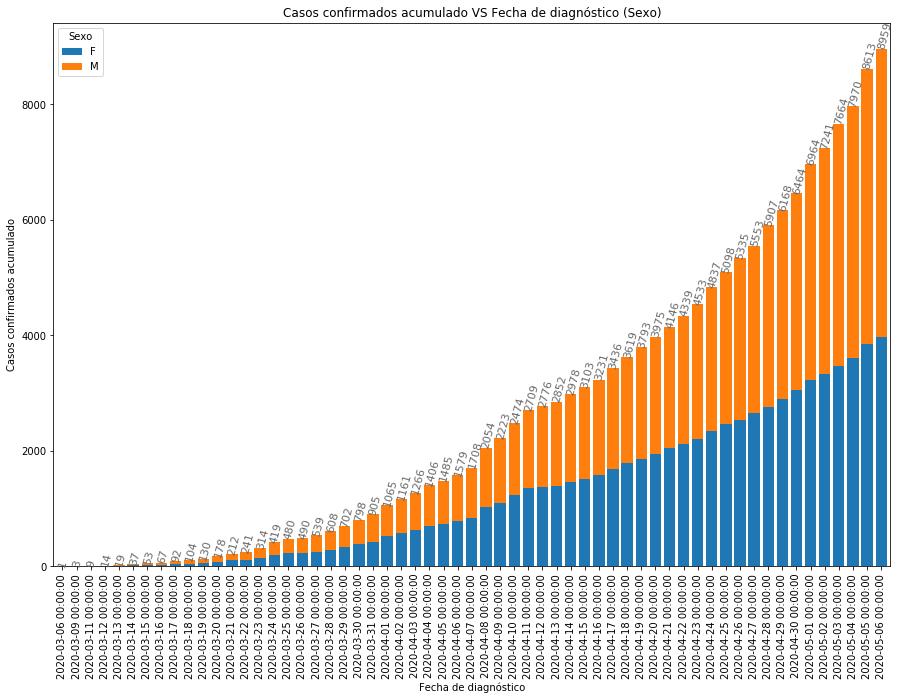

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,1,0,1,1,0,0,0,0,0
2020-03-11,0,1,4,1,1,1,0,0,1,0
2020-03-12,0,1,4,2,2,2,1,1,1,0
2020-03-13,0,1,5,2,4,2,3,1,1,0
2020-03-14,0,2,12,3,5,6,3,5,1,0
2020-03-15,0,2,18,5,9,8,5,5,1,0
2020-03-16,0,3,23,10,9,10,6,5,1,0
2020-03-17,1,5,27,15,14,17,6,6,1,0


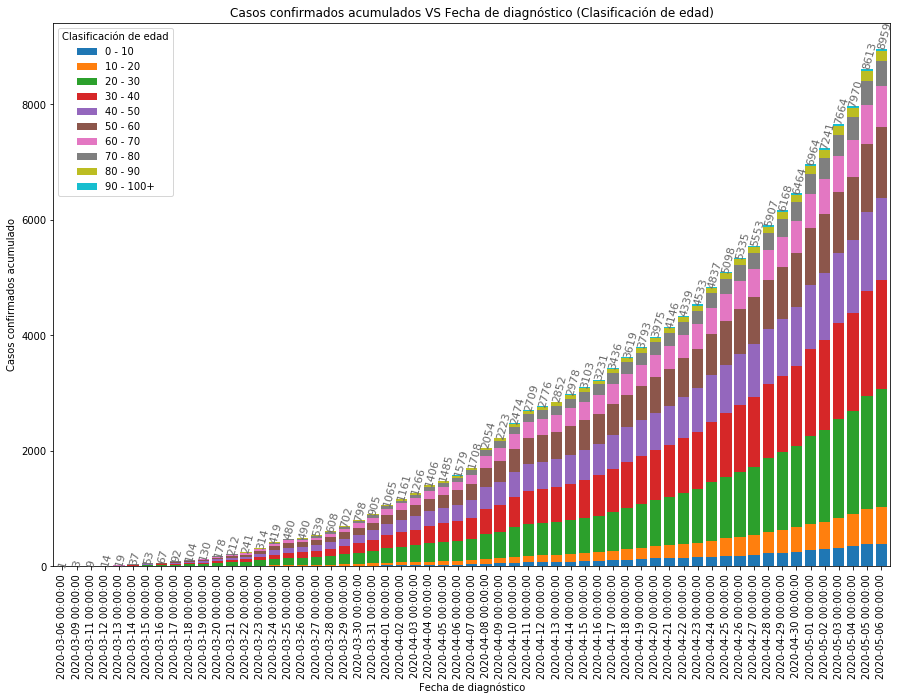

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,3.0
2020-03-11,0.0,0.0,0.0,0.0,0.0,9.0
2020-03-12,0.0,0.0,0.0,0.0,0.0,14.0
2020-03-13,1.0,0.0,0.0,0.0,0.0,18.0
2020-03-14,1.0,0.0,0.0,0.0,0.0,36.0
2020-03-15,2.0,0.0,0.0,0.0,0.0,51.0
2020-03-16,2.0,1.0,0.0,0.0,0.0,64.0
2020-03-17,3.0,1.0,0.0,0.0,0.0,88.0


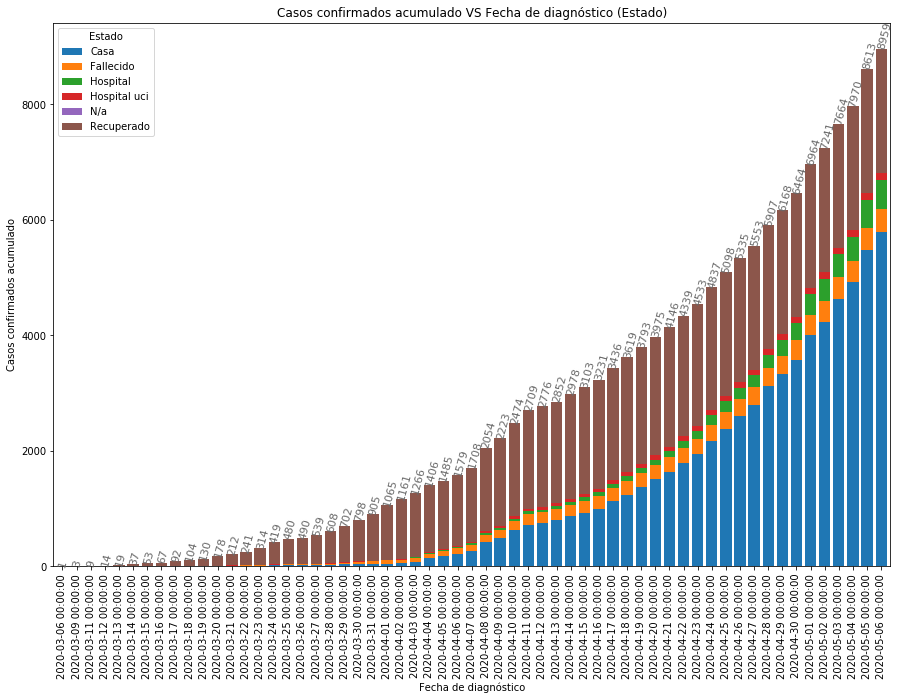

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>